# 3MTT CAPSTONE PROJECT

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


import warnings
warnings.filterwarnings("ignore", category=UserWarning)

### Data Loading

In [2]:
df=pd.read_csv(r"C:\Users\lilnu\Downloads\Datasets\Covid 19 capstone\country_wise_latest.csv")
df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


# Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [4]:
df.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(187, 15)

In [7]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


# Exploratory Data Analysis

### Total confirmed cases by WHO Region

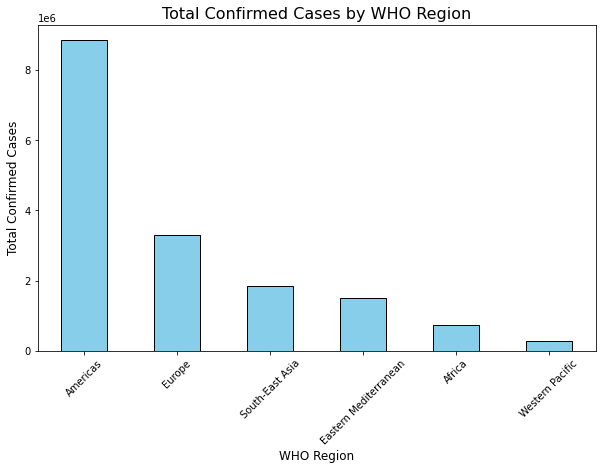

In [8]:
region_cases = df.groupby('WHO Region')['Confirmed'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
region_cases.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Confirmed Cases by WHO Region', fontsize=16)
plt.xlabel('WHO Region', fontsize=12)
plt.ylabel('Total Confirmed Cases', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Heatmap to analyze correlations

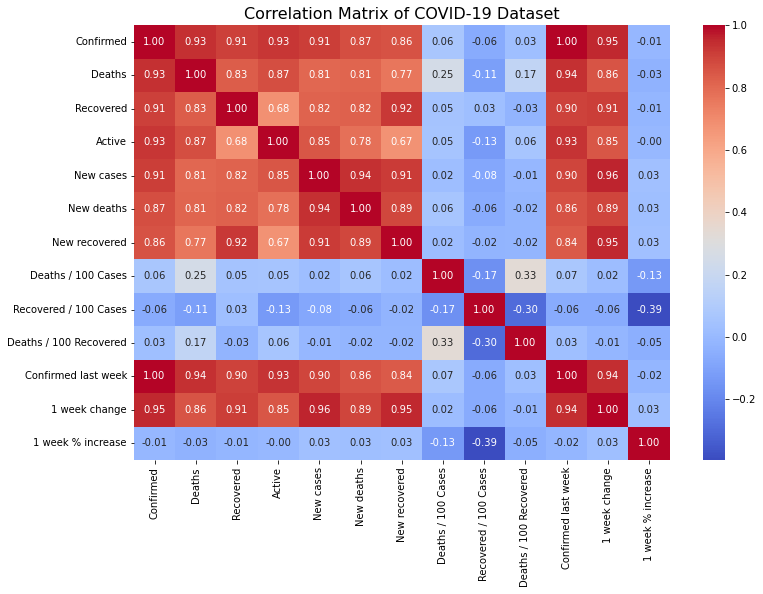

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix of COVID-19 Dataset', fontsize=16)
plt.show()

### Top 10 countries by confirmed cases

In [10]:
df.sort_values(by = "Confirmed",ascending = False, ignore_index = True)


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
1,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
2,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
3,Russia,816680,13334,602249,201097,5607,85,3077,1.63,73.74,2.21,776212,40468,5.21,Europe
4,South Africa,452529,7067,274925,170537,7096,298,9848,1.56,60.75,2.57,373628,78901,21.12,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Dominica,18,0,18,0,0,0,0,0.00,100.00,0.00,18,0,0.00,Americas
183,Saint Kitts and Nevis,17,0,15,2,0,0,0,0.00,88.24,0.00,17,0,0.00,Americas
184,Greenland,14,0,13,1,1,0,0,0.00,92.86,0.00,13,1,7.69,Europe
185,Holy See,12,0,12,0,0,0,0,0.00,100.00,0.00,12,0,0.00,Europe


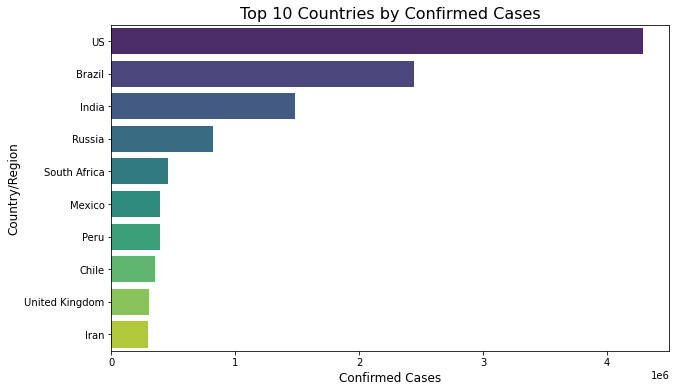

In [11]:
top_countries = df.nlargest(10, 'Confirmed')[['Country/Region', 'Confirmed']]
plt.figure(figsize=(10, 6))
sns.barplot(x='Confirmed', y='Country/Region', data=top_countries, palette='viridis')
plt.title('Top 10 Countries by Confirmed Cases', fontsize=16)
plt.xlabel('Confirmed Cases', fontsize=12)
plt.ylabel('Country/Region', fontsize=12)
plt.show()

### Top 10 countries by confirmed Deaths

In [12]:
df.sort_values(by="Deaths", ascending= False, ignore_index= True)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
1,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
2,United Kingdom,301708,45844,1437,254427,688,7,3,15.19,0.48,3190.26,296944,4764,1.60,Europe
3,Mexico,395489,44022,303810,47657,4973,342,8588,11.13,76.82,14.49,349396,46093,13.19,Americas
4,Italy,246286,35112,198593,12581,168,5,147,14.26,80.64,17.68,244624,1662,0.68,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Laos,20,0,19,1,0,0,0,0.00,95.00,0.00,19,1,5.26,Western Pacific
183,Greenland,14,0,13,1,1,0,0,0.00,92.86,0.00,13,1,7.69,Europe
184,Cambodia,226,0,147,79,1,0,4,0.00,65.04,0.00,171,55,32.16,Western Pacific
185,Grenada,23,0,23,0,0,0,0,0.00,100.00,0.00,23,0,0.00,Americas


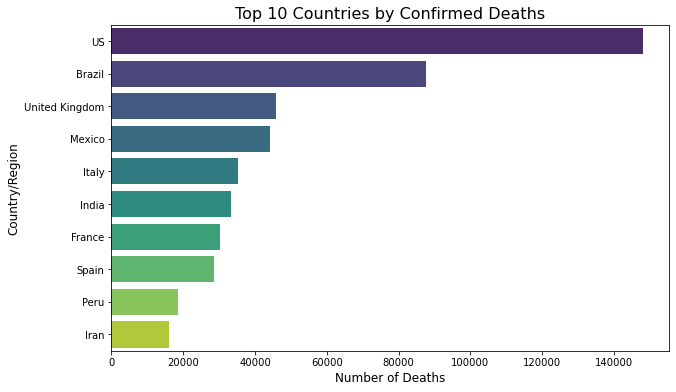

In [13]:
top_countries = df.nlargest(10, 'Deaths')[['Country/Region', 'Deaths']]
plt.figure(figsize=(10, 6))
sns.barplot(x='Deaths', y='Country/Region', data=top_countries, palette='viridis')
plt.title('Top 10 Countries by Confirmed Deaths', fontsize=16)
plt.xlabel('Number of Deaths', fontsize=12)
plt.ylabel('Country/Region', fontsize=12)
plt.show()

### Top 10 countries by Weekly Increase Rate

In [14]:
df.sort_values(by="1 week % increase", ascending= False, ignore_index= True)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Papua New Guinea,62,0,11,51,0,0,0,0.00,17.74,0.00,19,43,226.32,Western Pacific
1,Gambia,326,8,66,252,49,2,6,2.45,20.25,12.12,112,214,191.07,Africa
2,Bahamas,382,11,91,280,40,0,0,2.88,23.82,12.09,174,208,119.54,Americas
3,Zimbabwe,2704,36,542,2126,192,2,24,1.33,20.04,6.64,1713,991,57.85,Africa
4,Libya,2827,64,577,2186,158,4,24,2.26,20.41,11.09,1980,847,42.78,Eastern Mediterranean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Holy See,12,0,12,0,0,0,0,0.00,100.00,0.00,12,0,0.00,Europe
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Liechtenstein,86,1,81,4,0,0,0,1.16,94.19,1.23,86,0,0.00,Europe
185,Fiji,27,0,18,9,0,0,0,0.00,66.67,0.00,27,0,0.00,Western Pacific


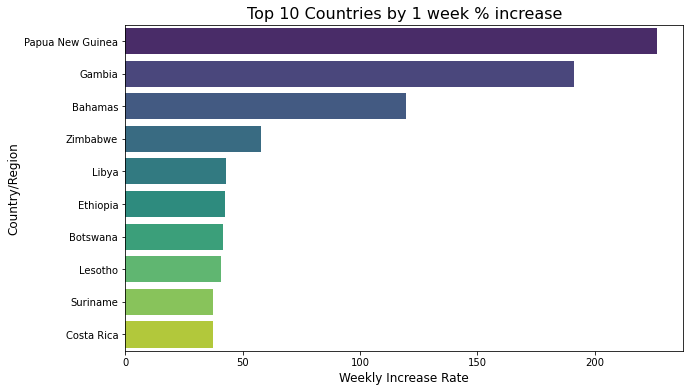

In [15]:
top_countries = df.nlargest(10, '1 week % increase')[['Country/Region', '1 week % increase']]
plt.figure(figsize=(10, 6))
sns.barplot(x='1 week % increase', y='Country/Region', data=top_countries, palette='viridis')
plt.title('Top 10 Countries by 1 week % increase', fontsize=16)
plt.xlabel('Weekly Increase Rate', fontsize=12)
plt.ylabel('Country/Region', fontsize=12)
plt.show()

### Recovery Rate

In [16]:
df['Recovery Rate'] = ((df['Recovered'] / df['Confirmed']) * 100)

In [17]:
df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Recovery Rate
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,69.486805
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe,56.250000
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa,67.339935
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe,88.533627
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa,25.473684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean,35.326240
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa,80.000000
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean,49.260792
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa,61.840949


### Top 10 Countries by Recovery Rate

In [18]:
Recovery_Rate = df.sort_values(by="Recovery Rate", ascending= False, ignore_index= True)
Top_10 = Recovery_Rate.head(10)
Top_10

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Recovery Rate
0,Holy See,12,0,12,0,0,0,0,0.00,100.00,0.00,12,0,0.00,Europe,100.000000
1,Grenada,23,0,23,0,0,0,0,0.00,100.00,0.00,23,0,0.00,Americas,100.000000
2,Dominica,18,0,18,0,0,0,0,0.00,100.00,0.00,18,0,0.00,Americas,100.000000
3,Djibouti,5059,58,4977,24,9,0,11,1.15,98.38,1.17,5020,39,0.78,Eastern Mediterranean,98.379126
4,Iceland,1854,10,1823,21,7,0,0,0.54,98.33,0.55,1839,15,0.82,Europe,98.327940
5,Brunei,141,3,138,0,0,0,0,2.13,97.87,2.17,141,0,0.00,Western Pacific,97.872340
6,New Zealand,1557,22,1514,21,1,0,1,1.41,97.24,1.45,1555,2,0.13,Western Pacific,97.238279
7,Qatar,109597,165,106328,3104,292,0,304,0.15,97.02,0.16,107037,2560,2.39,Eastern Mediterranean,97.017254
8,Malaysia,8904,124,8601,179,7,0,1,1.39,96.60,1.44,8800,104,1.18,Western Pacific,96.597035
9,Mauritius,344,10,332,2,0,0,0,2.91,96.51,3.01,343,1,0.29,Africa,96.511628


### Last 10 Countries by Recovery Rate

In [19]:
Last_10 = Recovery_Rate.tail(10)
Last_10

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Recovery Rate
177,Botswana,739,2,63,674,53,1,11,0.27,8.53,3.17,522,217,41.57,Africa,8.525034
178,Namibia,1843,8,101,1734,68,0,26,0.43,5.48,7.92,1344,499,37.13,Africa,5.480195
179,United Kingdom,301708,45844,1437,254427,688,7,3,15.19,0.48,3190.26,296944,4764,1.60,Europe,0.476288
180,Netherlands,53413,6160,189,47064,419,1,0,11.53,0.35,3259.26,52132,1281,2.46,Europe,0.353846
181,Sweden,79395,5700,0,73695,398,3,0,7.18,0.00,inf,78048,1347,1.73,Europe,0.000000
182,Canada,116458,8944,0,107514,682,11,0,7.68,0.00,inf,112925,3533,3.13,Americas,0.000000
183,Syria,674,40,0,634,24,2,0,5.93,0.00,inf,522,152,29.12,Eastern Mediterranean,0.000000
184,Serbia,24141,543,0,23598,411,9,0,2.25,0.00,inf,21253,2888,13.59,Europe,0.000000
185,Mozambique,1701,11,0,1690,32,0,0,0.65,0.00,inf,1507,194,12.87,Africa,0.000000
186,Timor-Leste,24,0,0,24,0,0,0,0.00,0.00,0.00,24,0,0.00,South-East Asia,0.000000


### Top 20 Countries by Recovery Rate

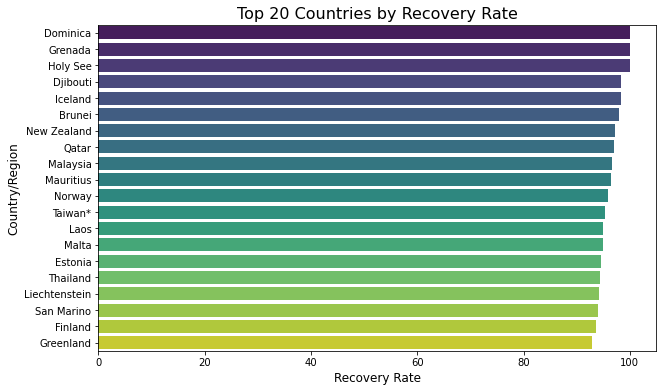

In [20]:
top_countries = df.nlargest(20, 'Recovery Rate')[['Country/Region', 'Recovery Rate']]
plt.figure(figsize=(10, 6))
sns.barplot(x='Recovery Rate', y='Country/Region', data=top_countries, palette='viridis')
plt.title('Top 20 Countries by Recovery Rate', fontsize=16)
plt.xlabel('Recovery Rate', fontsize=12)
plt.ylabel('Country/Region', fontsize=12)
plt.show()

### WHO Death Rate By Region

In [21]:
Region=df.groupby("WHO Region")["Deaths"].sum()
Region

WHO Region
Africa                    12223
Americas                 342732
Eastern Mediterranean     38339
Europe                   211144
South-East Asia           41349
Western Pacific            8249
Name: Deaths, dtype: int64

([<matplotlib.patches.Wedge at 0x24e5fdfba60>,
 [Text(-0.06513276108491761, 1.1080874168735315, 'Africa'),
  Text(-1.0894112543320762, -0.21279830576067216, 'America'),
  Text(0.48535116126916183, -0.9982656210922403, 'Eastern Mediterranean'),
  Text(1.1064400338459215, 0.0888282134405299, 'Europe'),
  Text(0.3044731902624333, 1.0674249746054363, 'South-East Asia'),
  Text(0.04397018330717401, 1.1091287675378065, 'Western Pacific')],
 [Text(-0.0357936795151349, 0.6089489408043731, '1.9%'),
  Text(-0.5986854640924022, -0.11694321307568468, '52.4%'),
  Text(0.26672451204881864, -0.5485964224020419, '5.9%'),
  Text(0.6080436222036144, 0.04881550468353445, '32.3%'),
  Text(0.1673231045586345, 0.5866029139723568, '6.3%'),
  Text(0.024163794430068594, 0.6095212145928486, '1.3%')])

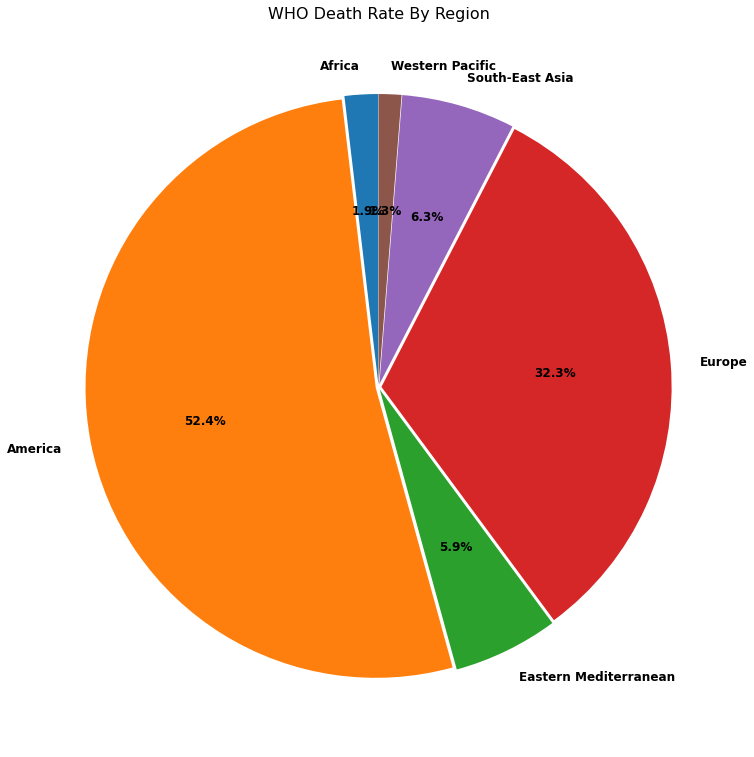

In [36]:
plt.figure(figsize=(13,15))
plt.title('WHO Death Rate By Region', fontsize=16)
plt.pie(Region, 
            labels =["Africa","America", "Eastern Mediterranean", "Europe", "South-East Asia", "Western Pacific"],
            startangle = 90,
            explode = (0.01,0.01,0.01,0.01,0.01,0.01),
            autopct = ("%1.1f%%"),
             textprops = {"color":"black","fontsize":12,"fontweight": "bold"})

# Building the Predictive Model

### Select features for predictive modeling

In [37]:
features = ['Confirmed last week', '1 week change', '1 week % increase']
target = 'Confirmed'

### Extracting feature matrix and target variable

In [38]:
X = df[features]
y = df[target]

In [39]:
X

,Confirmed last week,1 week change,1 week % increase
0,35526,737,2.07
1,4171,709,17.00
2,23691,4282,18.07
3,884,23,2.60
4,749,201,26.84
...,...,...,...
182,8916,1705,19.12
183,10,0,0.00
184,1619,72,4.45
185,3326,1226,36.86


In [40]:
y

0      36263
1       4880
2      27973
3        907
4        950
       ...  
182    10621
183       10
184     1691
185     4552
186     2704
Name: Confirmed, Length: 187, dtype: int64

### Split data into training and testing sets

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Initialize and train the model

In [42]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Predict on test data

In [43]:
y_pred = model.predict(X_test)

### Model evaluation

In [44]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Model Evaluation Metrics:
Mean Absolute Error (MAE): 2.0640985996435216e-11
Mean Squared Error (MSE): 1.2411808863543892e-21
R-squared (R2): 1.0


### Compare predicted and actual values

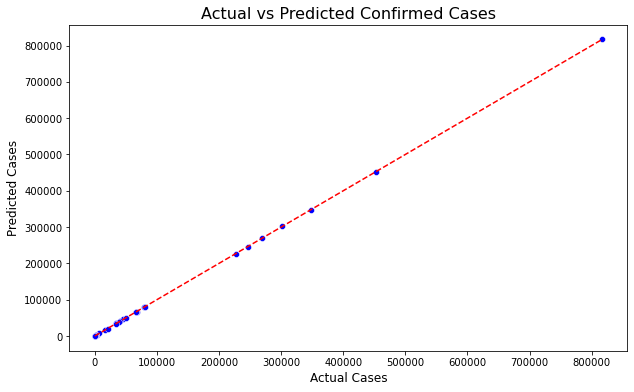

In [45]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plt.figure(figsize=(10, 6))
sns.scatterplot(x=comparison['Actual'], y=comparison['Predicted'], color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Confirmed Cases', fontsize=16)
plt.xlabel('Actual Cases', fontsize=12)
plt.ylabel('Predicted Cases', fontsize=12)
plt.show()